# GRIP : The Sparks Foundation


# Data Science & Business Analytics Intern

# Author : Komal Jain


# Task 3 : Prediction Using Decision Tree Algorithm


# Problem Statement : 
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


# Decision Tree Algorithm

Graphical visualization of all the possible solutions to the decision based on certain conditions.

# Import  Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Reading  the dataset

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking the correlation

In [7]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

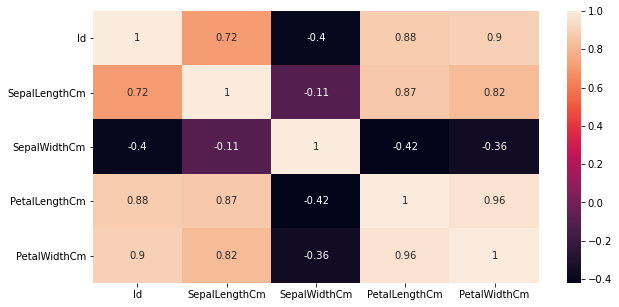

In [8]:
plt.figure(figsize=(10,5))
# annot = True to print the values inside the square
sns.heatmap(df.corr(),annot=True,)
# annot = True to print the values inside the square



# Lable Encoding

In [9]:
df.drop('Id',axis=1,inplace=True)
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.head()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model initialization 

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [11]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


# Split data in training and testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

# Model Initilization

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [16]:
y_predict = dtc.predict(x_test)
y_predict

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0], dtype=int64)

# Making the confusion Matrix

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)

array([[20,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 11]], dtype=int64)

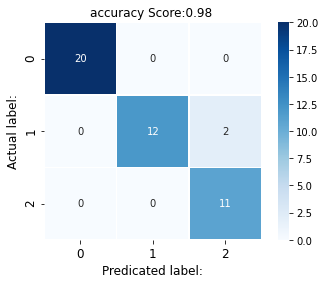

In [18]:
accuracy_score(y_test,y_predict)
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='.0f',linewidths=0.5,square=True,cmap="Blues")
plt.title("accuracy Score:0.98 ",fontsize=12)
plt.xlabel("Predicated label:",fontsize=12)
plt.ylabel("Actual label:",fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

# Classification Report

In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [20]:
accuracy_score(y_test,y_predict)

0.9555555555555556

# We Got 98 % Accuracy For This Model.


# Model Visualization.

In [21]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_1 <= 3.05
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.05
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



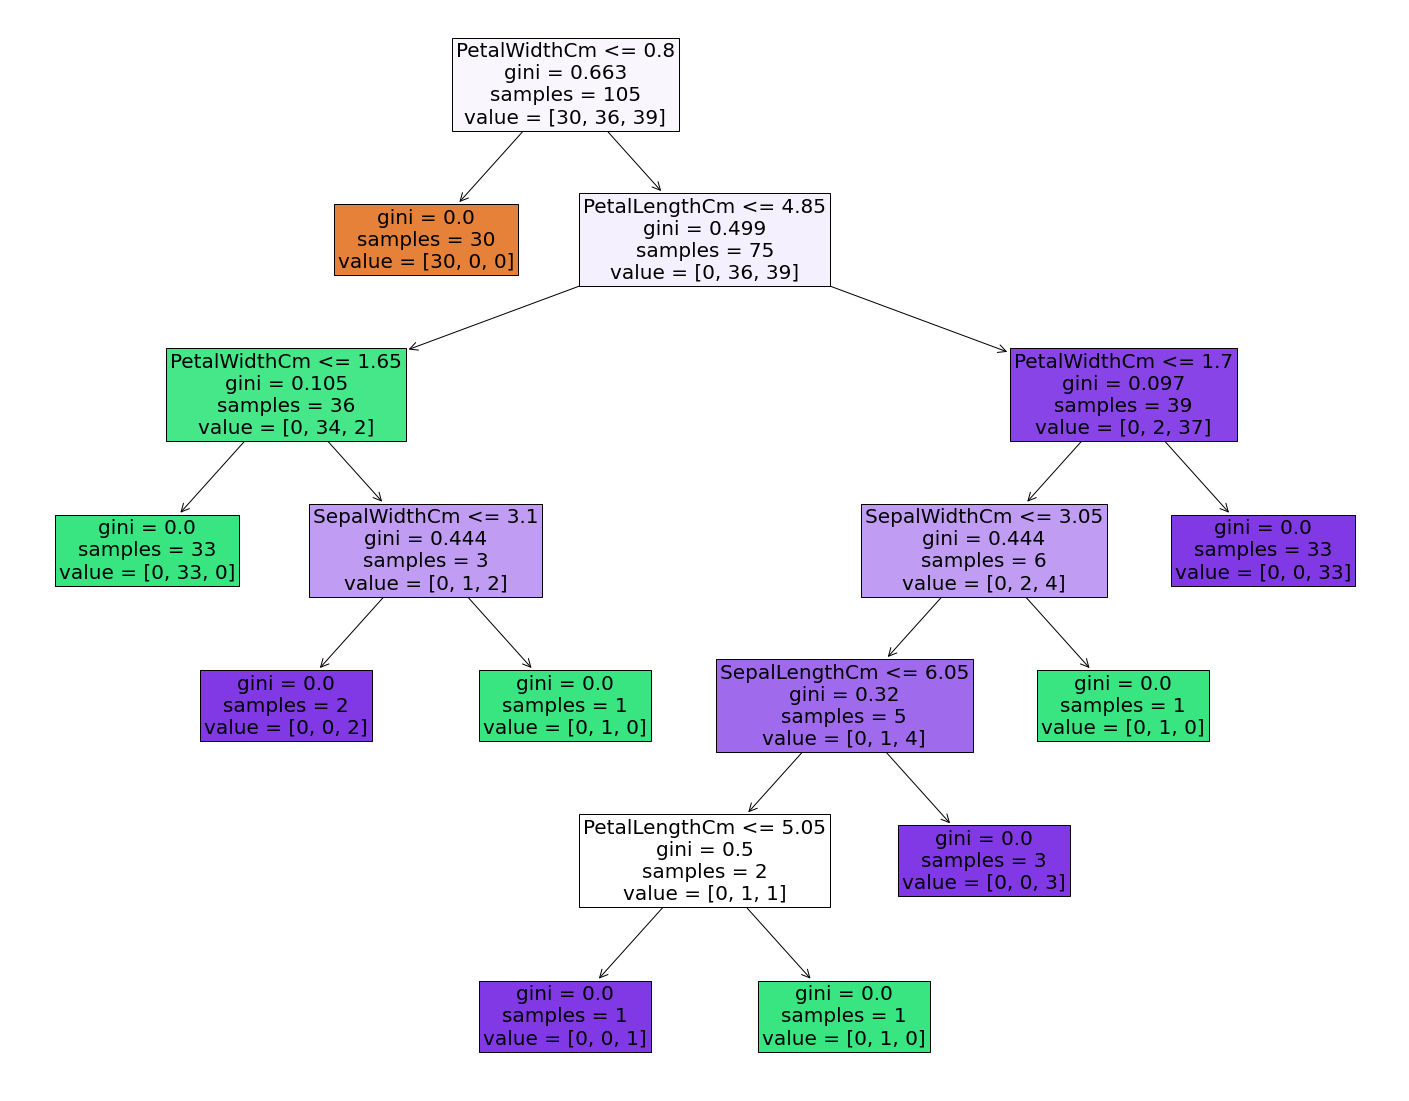

In [22]:
plt.figure(figsize=(25,20))
dtc_plot = tree.plot_tree(dtc,feature_names=x.columns,filled=True,fontsize=20)

# Prediction On Randomly Created Data.

In [23]:
new_data =  pd.DataFrame({'SepalLengthCm':[4.4,5.4,6.4,5.9,4.8],
                         'SepalWidthCm':[2.1,2.5,3.2,3.5,4.1],
                         'PetalLengthCm':[1.5,2.5,3.5,4.5,5.5],
                         'PetalWidthCm':[0.3,0.7,1.5,1.8,2.2]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,2.1,1.5,0.3
1,5.4,2.5,2.5,0.7
2,6.4,3.2,3.5,1.5
3,5.9,3.5,4.5,1.8
4,4.8,4.1,5.5,2.2


In [24]:
new_predict = dtc.predict(new_data)

In [25]:
new_data['Predicted_Species'] = new_predict
new_data['Predicted_Species'] = new_data['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.4,2.1,1.5,0.3,Iris-setosa
1,5.4,2.5,2.5,0.7,Iris-setosa
2,6.4,3.2,3.5,1.5,Iris-versicolor
3,5.9,3.5,4.5,1.8,Iris-versicolor
4,4.8,4.1,5.5,2.2,Iris-virginica


# Thank You...